In [1]:
#pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv("log_dataset.csv")

In [7]:
pd.set_option("display.max_colwidth", None)
df.head()

,username,log_entry
0,george,"14.94.217.222 - - [27/Dec/2037:12:00:00 +0000] ""['GET'] ['/usr'] HTTP/1.0"" ['303'] 5041 ""['http://morgan.biz/wp-contentcategory.htm']"" ""['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']"" 4077\n"
1,paul,"193.223.88.250 - - [27/Dec/2037:12:00:00 +0000] ""['GET'] ['/usr/register'] HTTP/1.0"" ['502'] 5063 ""['-']"" ""['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']"" 2491\n"
2,george,"111.75.113.143 - - [27/Dec/2037:12:00:00 +0000] ""['GET'] ['/usr/admin'] HTTP/1.0"" ['304'] 5055 ""['http://morgan.biz/wp-contentcategory.htm']"" ""['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36']"" 2646\n"
3,george,"129.185.58.19 - - [27/Dec/2037:12:00:00 +0000] ""['POST'] ['/usr/admin'] HTTP/1.0"" ['403'] 4931 ""['http://morgan.biz/wp-contentcategory.htm']"" ""['Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0']"" 834\n"
4,john,"40.181.173.69 - - [27/Dec/2037:12:00:00 +0000] ""['POST'] ['/usr'] HTTP/1.0"" ['304'] 5014 ""['-']"" ""['Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1']"" 3221\n"


# **Clean the data**

In [8]:
# Split the 'log_entry" column into multiple columns wherever the '"' character appears. Give the new columns, new names
df[['IP and Event Time','Request Type and Endpoint','Status Code','Referrer','4','User Agent','6']] = df['log_entry'].str.split('"', expand=True)
df.drop(columns=['log_entry'], inplace=True)
df.head()

,username,IP and Event Time,Request Type and Endpoint,Status Code,Referrer,4,User Agent,6
0,george,14.94.217.222 - - [27/Dec/2037:12:00:00 +0000],['GET'] ['/usr'] HTTP/1.0,['303'] 5041,['http://morgan.biz/wp-contentcategory.htm'],,"['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']",4077\n
1,paul,193.223.88.250 - - [27/Dec/2037:12:00:00 +0000],['GET'] ['/usr/register'] HTTP/1.0,['502'] 5063,['-'],,"['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']",2491\n
2,george,111.75.113.143 - - [27/Dec/2037:12:00:00 +0000],['GET'] ['/usr/admin'] HTTP/1.0,['304'] 5055,['http://morgan.biz/wp-contentcategory.htm'],,"['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36']",2646\n
3,george,129.185.58.19 - - [27/Dec/2037:12:00:00 +0000],['POST'] ['/usr/admin'] HTTP/1.0,['403'] 4931,['http://morgan.biz/wp-contentcategory.htm'],,['Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0'],834\n
4,john,40.181.173.69 - - [27/Dec/2037:12:00:00 +0000],['POST'] ['/usr'] HTTP/1.0,['304'] 5014,['-'],,"['Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1']",3221\n


In [9]:
# Split the 'IP and Event Time column into IP and Event Time. Drop the original columnn
df[['IP','Event Time']] = df['IP and Event Time'].str.split('- -', expand=True)
df.drop(columns=['IP and Event Time'], inplace=True)

In [10]:
# In the 'Request Type and Endpoint' column drop the 'HTTP/1.0' string
df['Request Type and Endpoint'] = df['Request Type and Endpoint'].str.replace('HTTP/1.0', '')

In [11]:
# Check what's in column '4'
df['4'].unique()

array([' '], dtype=object)

In [12]:
# Since there's nothing in column '4', drop it
df.drop(columns=['4'],inplace=True)

In [13]:
# remove square brackets in every column
for c in df.columns:
    df[c] = df[c].str.replace("]","")
    df[c] = df[c].str.replace("[","")

In [14]:
# Split the 'Request Type and Endpoint' column into separate 'Request Type' and 'Endpoint' columns
df[['Request Type','Endpoint']] = df['Request Type and Endpoint'].str.split(' ', expand=True).drop(columns=[2])
df.drop(columns=['Request Type and Endpoint'], inplace=True)

In [15]:
df['Status Code']

0         '303' 5041 
1         '502' 5063 
2         '304' 5055 
3         '403' 4931 
4         '304' 5014 
             ...     
99995     '403' 4948 
99996     '500' 4983 
99997     '500' 5016 
99998     '304' 5084 
99999     '502' 5066 
Name: Status Code, Length: 100000, dtype: object

In [16]:
# Split the 'Status Code' column into a column for the 'Status Code' and another one for the 'Status Code Number'
df[['Status Code','Status Code Number']] = df['Status Code'].str.split(" ", expand=True).drop(columns=[0,3])


In [17]:
df.head()

,username,Status Code,Referrer,User Agent,6,IP,Event Time,Request Type,Endpoint,Status Code Number
0,george,'303','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",4077\n,14.94.217.222,27/Dec/2037:12:00:00 +0000,'GET','/usr',5041
1,paul,'502','-',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",2491\n,193.223.88.250,27/Dec/2037:12:00:00 +0000,'GET','/usr/register',5063
2,george,'304','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'",2646\n,111.75.113.143,27/Dec/2037:12:00:00 +0000,'GET','/usr/admin',5055
3,george,'403','http://morgan.biz/wp-contentcategory.htm','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',834\n,129.185.58.19,27/Dec/2037:12:00:00 +0000,'POST','/usr/admin',4931
4,john,'304','-',"'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",3221\n,40.181.173.69,27/Dec/2037:12:00:00 +0000,'POST','/usr',5014


In [18]:
# Rearrange the columns in the dataframe 
df = df[['username','Event Time','Request Type','Endpoint','Status Code','Referrer','User Agent','IP','Status Code Number','6']]

In [19]:
df.head()

,username,Event Time,Request Type,Endpoint,Status Code,Referrer,User Agent,IP,Status Code Number,6
0,george,27/Dec/2037:12:00:00 +0000,'GET','/usr','303','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",14.94.217.222,5041,4077\n
1,paul,27/Dec/2037:12:00:00 +0000,'GET','/usr/register','502','-',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",193.223.88.250,5063,2491\n
2,george,27/Dec/2037:12:00:00 +0000,'GET','/usr/admin','304','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'",111.75.113.143,5055,2646\n
3,george,27/Dec/2037:12:00:00 +0000,'POST','/usr/admin','403','http://morgan.biz/wp-contentcategory.htm','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',129.185.58.19,4931,834\n
4,john,27/Dec/2037:12:00:00 +0000,'POST','/usr','304','-',"'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",40.181.173.69,5014,3221\n


## Event Time 

In [20]:
df['Event Time'].unique()

array([' 27/Dec/2037:12:00:00 +0000 '], dtype=object)

In [21]:
#In the Event Time column remove '+0000' 
df['Event Time'] = df['Event Time'].str.replace('+0000','')

In [22]:
#In the Event Time column change the year from '2037' to '2023'
#df['Event Time'] = df['Event Time'].str.replace('2037','2017')

In [23]:
#remove empty spaces before and after the string
df['Event Time'] = df['Event Time'].str.strip()

### Turn Event Time into a datetime variable and created another column for 'Elapsed time'

In [24]:
# Convert the 'Event Time' column to a date time format
df['Event Time'] = pd.to_datetime(df['Event Time'], format= '%d/%b/%Y:%H:%M:%S')

In [25]:
df['Event Time'].unique()

<DatetimeArray>
['2037-12-27 12:00:00']
Length: 1, dtype: datetime64[ns]

In [26]:
# create a new column in df that contains the starting time for each username
df['starting date'] = df.groupby('username')['Event Time'].transform('min')

In [27]:
# create a new column called Elapsed time, where the column values are calculated as being the difference between the instantaneous time and the starting time.
df['Elapsed_time'] = pd.to_timedelta(df['Event Time'] - df['starting date']).dt.total_seconds()

In [28]:
# get the min and max values from the Elapsed_time column
df['Elapsed_time'].min(), df['Elapsed_time'].max()

(0.0, 0.0)

In [29]:
df.head()

,username,Event Time,Request Type,Endpoint,Status Code,Referrer,User Agent,IP,Status Code Number,6,starting date,Elapsed_time
0,george,2037-12-27 12:00:00,'GET','/usr','303','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",14.94.217.222,5041,4077\n,2037-12-27 12:00:00,0.0
1,paul,2037-12-27 12:00:00,'GET','/usr/register','502','-',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",193.223.88.250,5063,2491\n,2037-12-27 12:00:00,0.0
2,george,2037-12-27 12:00:00,'GET','/usr/admin','304','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'",111.75.113.143,5055,2646\n,2037-12-27 12:00:00,0.0
3,george,2037-12-27 12:00:00,'POST','/usr/admin','403','http://morgan.biz/wp-contentcategory.htm','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',129.185.58.19,4931,834\n,2037-12-27 12:00:00,0.0
4,john,2037-12-27 12:00:00,'POST','/usr','304','-',"'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",40.181.173.69,5014,3221\n,2037-12-27 12:00:00,0.0


## username

In [30]:
df['username'].value_counts()

username
john      31421
paul      31373
george    31340
ringo      5866
Name: count, dtype: int64

In [31]:
#drop 'ringo'
df = df[df['username'] != 'ringo']

In [32]:
df['username'].value_counts()

username
john      31421
paul      31373
george    31340
Name: count, dtype: int64

In [33]:
# Check how many unique usernames there are and what those usernames are
print("number of unique usernames =", len(df['username'].unique()))
print("usernames =", df['username'].unique())

number of unique usernames = 3
usernames = ['george' 'paul' 'john']


In [34]:
# Label encode the username
df['username encoded'] = df['username'].astype('category').cat.codes

In [35]:
df.head()

,username,Event Time,Request Type,Endpoint,Status Code,Referrer,User Agent,IP,Status Code Number,6,starting date,Elapsed_time,username encoded
0,george,2037-12-27 12:00:00,'GET','/usr','303','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",14.94.217.222,5041,4077\n,2037-12-27 12:00:00,0.0,0
1,paul,2037-12-27 12:00:00,'GET','/usr/register','502','-',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'",193.223.88.250,5063,2491\n,2037-12-27 12:00:00,0.0,2
2,george,2037-12-27 12:00:00,'GET','/usr/admin','304','http://morgan.biz/wp-contentcategory.htm',"'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'",111.75.113.143,5055,2646\n,2037-12-27 12:00:00,0.0,0
3,george,2037-12-27 12:00:00,'POST','/usr/admin','403','http://morgan.biz/wp-contentcategory.htm','Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',129.185.58.19,4931,834\n,2037-12-27 12:00:00,0.0,0
4,john,2037-12-27 12:00:00,'POST','/usr','304','-',"'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",40.181.173.69,5014,3221\n,2037-12-27 12:00:00,0.0,1


## Request Types

In [36]:
# Check how many unique Request Types there are and what those Request Types are
print("number of unique Request Types =", len(df['Request Type'].unique()))
print("Types of Request Types =", df['Request Type'].unique())

number of unique Request Types = 4
Types of Request Types = ["'GET'" "'POST'" "'DELETE'" "'PUT'"]


In [37]:
#since the labels in Request Types are non-ordinal and there are only four of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_request_types = pd.get_dummies(df['Request Type'], prefix='Request_Type', dtype=int)

#drop Request Types column from df
df.drop(['Request Type'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_request_types)

## Endpoint

In [38]:
# Check how many unique Endpoints there are 
print("number of unique Endpoints =", len(df['Endpoint'].unique()))


number of unique Endpoints = 5


In [39]:
#since the labels in Endpoint are non-ordinal and there are only 5 of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_endpoints = pd.get_dummies(df['Endpoint'], prefix='Endpoint', dtype=int)

#drop Request Types column from df
df.drop(['Endpoint'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_endpoints)

## Status Codes

In [40]:
# Check how many unique Status Codes there are too.
print("number of unique Status Codes =", len(df['Status Code'].unique()))

number of unique Status Codes = 7


In [41]:
#since the labels in Status Code are non-ordinal and there are only 7 of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_status_code = pd.get_dummies(df['Status Code'], prefix='Status_Code', dtype=int)

#drop Request Types column from df
df.drop(['Status Code'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_status_code)

## Referrers

In [42]:
# Get number of unique Referrers
print(len(df['Referrer'].unique()))

2


In [43]:
# Get unique Referrers
print("Types of Referrer =", df['Referrer'].unique())

Types of Referrer = ["'http://morgan.biz/wp-contentcategory.htm'" "'-'"]


In [44]:
#since the labels in Referrer are non-ordinal and there are only 2 of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_referrer = pd.get_dummies(df['Referrer'], prefix='Referrer', dtype=int)

#drop Request Types column from df
df.drop(['Referrer'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_referrer)

## User Agents

In [45]:
# Get unique User Agents
len(df['User Agent'].unique())

10

In [46]:
#since the labels in User Agent are non-ordinal and there are only 10 of them, best to use one-hot encoding here

#get one hot encoding columns of Request Types column
one_hot_user_agents = pd.get_dummies(df['User Agent'], prefix='User_Agent', dtype=int)

#drop Request Types column from df
df.drop(['User Agent'], axis=1, inplace=True) 

# Join the encoded df
df = df.join(one_hot_user_agents)

In [47]:
df.head()

,username,Event Time,IP,Status Code Number,6,starting date,Elapsed_time,username encoded,Request_Type_'DELETE',Request_Type_'GET',...,User_Agent_'Mozilla/5.0 (Android 10; Mobile; rv:84.0) Gecko/84.0 Firefox/84.0',"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'"
0,george,2037-12-27 12:00:00,14.94.217.222,5041,4077\n,2037-12-27 12:00:00,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,paul,2037-12-27 12:00:00,193.223.88.250,5063,2491\n,2037-12-27 12:00:00,0.0,2,0,1,...,0,0,1,0,0,0,0,0,0,0
2,george,2037-12-27 12:00:00,111.75.113.143,5055,2646\n,2037-12-27 12:00:00,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,george,2037-12-27 12:00:00,129.185.58.19,4931,834\n,2037-12-27 12:00:00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,john,2037-12-27 12:00:00,40.181.173.69,5014,3221\n,2037-12-27 12:00:00,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## IP

In [48]:
# Get number of unique IP
print(len(df['IP'].unique()))

94133


In [49]:
# Check for duplicates
df.duplicated().any()

False

In [50]:
#Get any IP addresses that appear more than once
df['IP'].value_counts()[df['IP'].value_counts() > 1].index[0]

'172.68.193.171 '

In [51]:
#Get rows where IP address appears more than once
df[df['IP'].map(df['IP'].value_counts()) > 1]

,username,Event Time,IP,Status Code Number,6,starting date,Elapsed_time,username encoded,Request_Type_'DELETE',Request_Type_'GET',...,User_Agent_'Mozilla/5.0 (Android 10; Mobile; rv:84.0) Gecko/84.0 Firefox/84.0',"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'"
20495,john,2037-12-27 12:00:00,172.68.193.171,4964,2669\n,2037-12-27 12:00:00,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
59848,john,2037-12-27 12:00:00,172.68.193.171,5019,3705\n,2037-12-27 12:00:00,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
# Label encode the IP column
df['IP encoded'] = df['IP'].astype('category').cat.codes

In [53]:
df.head()

,username,Event Time,IP,Status Code Number,6,starting date,Elapsed_time,username encoded,Request_Type_'DELETE',Request_Type_'GET',...,"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",IP encoded
0,george,2037-12-27 12:00:00,14.94.217.222,5041,4077\n,2037-12-27 12:00:00,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,19087
1,paul,2037-12-27 12:00:00,193.223.88.250,5063,2491\n,2037-12-27 12:00:00,0.0,2,0,1,...,0,1,0,0,0,0,0,0,0,43696
2,george,2037-12-27 12:00:00,111.75.113.143,5055,2646\n,2037-12-27 12:00:00,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,6318
3,george,2037-12-27 12:00:00,129.185.58.19,4931,834\n,2037-12-27 12:00:00,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,13771
4,john,2037-12-27 12:00:00,40.181.173.69,5014,3221\n,2037-12-27 12:00:00,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,66349


In [54]:
#Check that the IP column label encoding was done properly, i.e. the same repeating IP should also have repeating encoded IPs
df[df['IP'].map(df['IP'].value_counts()) > 1]

,username,Event Time,IP,Status Code Number,6,starting date,Elapsed_time,username encoded,Request_Type_'DELETE',Request_Type_'GET',...,"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'",IP encoded
20495,john,2037-12-27 12:00:00,172.68.193.171,4964,2669\n,2037-12-27 12:00:00,0.0,1,0,1,...,0,0,0,0,0,1,0,0,0,34205
59848,john,2037-12-27 12:00:00,172.68.193.171,5019,3705\n,2037-12-27 12:00:00,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,34205


# **EDA**

In [55]:
df.dtypes

username                                                                                                                                                                    object
Event Time                                                                                                                                                          datetime64[ns]
IP                                                                                                                                                                          object
Status Code Number                                                                                                                                                          object
6                                                                                                                                                                           object
starting date                                                                                            

In [56]:
df_2 = df.drop(columns=['username','Status Code Number','Elapsed_time','Event Time','IP','6','starting date','IP encoded'])

In [57]:
#contruct a PMCC matrix on the combined data
corr_matrix = df_2.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,username encoded,Request_Type_'DELETE',Request_Type_'GET',Request_Type_'POST',Request_Type_'PUT',Endpoint_'/usr',Endpoint_'/usr/admin',Endpoint_'/usr/admin/developer',Endpoint_'/usr/login',Endpoint_'/usr/register',Status_Code_'200',Status_Code_'303',Status_Code_'304',Status_Code_'403',Status_Code_'404',Status_Code_'500',Status_Code_'502',Referrer_'-',Referrer_'http://morgan.biz/wp-contentcategory.htm',User_Agent_'Mozilla/5.0 (Android 10; Mobile; rv:84.0) Gecko/84.0 Firefox/84.0',"User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749'","User_Agent_'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'","User_Agent_'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329'","User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0'",User_Agent_'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',"User_Agent_'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'"
username encoded,1.000000,0.135857,-0.084067,-0.118531,0.076121,-0.214285,-0.244304,0.094706,0.238340,0.095368,-0.025092,-0.026602,-0.083405,-0.061222,-0.011713,0.113832,0.070190,-0.000664,0.000664,-0.235304,0.002683,-0.087573,0.038410,-0.138791,0.050849,0.095504,0.185852,-0.195342,0.169462
Request_Type_'DELETE',0.135857,1.000000,-0.471069,-0.425803,-0.263684,-0.053783,-0.047165,0.047332,0.011696,0.041448,0.009235,0.001996,-0.003523,0.001482,-0.009354,-0.001264,0.002046,0.003050,-0.003050,-0.003052,0.031738,-0.052482,0.022463,-0.029791,0.001726,0.033715,0.014848,-0.048577,0.013304
Request_Type_'GET',-0.084067,-0.471069,1.000000,-0.361254,-0.223711,0.017785,0.019994,-0.005080,-0.017602,-0.011606,0.002908,0.005705,0.010958,0.002172,-0.002368,-0.010574,-0.006292,-0.002167,0.002167,0.023691,0.000477,0.007638,-0.002879,0.012276,-0.005182,-0.008643,-0.019858,0.018750,-0.015439
Request_Type_'POST',-0.118531,-0.425803,-0.361254,1.000000,-0.202215,0.040789,0.038539,-0.037062,-0.013576,-0.028487,-0.002345,-0.005802,-0.000145,0.004697,0.005184,0.001292,-0.003041,0.001083,-0.001083,0.006078,-0.016940,0.034533,-0.017501,0.025154,-0.003140,-0.023483,-0.012958,0.035223,-0.014361
Request_Type_'PUT',0.076121,-0.263684,-0.223711,-0.202215,1.000000,0.000523,-0.009649,-0.014048,0.026056,-0.007457,-0.015034,-0.003287,-0.010173,-0.011811,0.010550,0.015342,0.010085,-0.003017,0.003017,-0.037701,-0.025835,0.021684,-0.006116,-0.006701,0.009115,-0.006786,0.023648,-0.001170,0.021575
Endpoint_'/usr',-0.214285,-0.053783,0.017785,0.040789,0.000523,1.000000,-0.215229,-0.170027,-0.274403,-0.318857,-0.000605,0.005583,0.006248,0.004513,0.003221,-0.003697,-0.013981,-0.006735,0.006735,0.032039,-0.022567,0.050537,-0.013017,0.041978,-0.010943,-0.040783,-0.037657,0.057147,-0.030461
Endpoint_'/usr/admin',-0.244304,-0.047165,0.019994,0.038539,-0.009649,-0.215229,1.000000,-0.152733,-0.246492,-0.286424,0.000279,0.002246,0.021927,0.012704,0.003573,-0.020544,-0.015971,0.000314,-0.000314,0.040125,-0.010393,0.036445,-0.013645,0.041063,-0.002524,-0.035291,-0.042442,0.054137,-0.039237
Endpoint_'/usr/admin/developer',0.094706,0.047332,-0.005080,-0.037062,-0.014048,-0.170027,-0.152733,1.000000,-0.194725,-0.226270,0.009145,0.003653,0.001009,0.003370,-0.006

# Random train, validation, test split

In [58]:
# constructing training, validation and test sets
def data_train_validate_test(df, training_set_percent=0.8, validation_set_percent=0.1, seed=None):
  np.random.seed(seed)  #set a random seed number such that the same index sampled here is repeated 
  permutation = np.random.permutation(df.index)  #random selection of the dataframe index
  #print(permutation)
  length = len(df.index)  #size of index of dataset
  #print(length)
  training_set_end = int(training_set_percent * length)  #size of the training set
  #print(training_set_end)
  validation_set_end = int(validation_set_percent * length) + training_set_end  #size of the validation set + training set
  #print(validation_set_end)
  training = df.loc[permutation[:training_set_end]] #select random rows up to the size of the training set to form the training dataset
  validation = df.loc[permutation[training_set_end:validation_set_end]] #select random rows up to the size of validation set to form the validation dataset
  test = df.loc[permutation[validation_set_end:]] #The remaining rows from the validation set onwards to the end will be the test dataset
  return training, validation, test

In [59]:
# generate training, validation and test sets
training, validation, test = data_train_validate_test(df_2)

In [60]:
# check the shapes of the training, validation and test sets
training.shape, validation.shape, test.shape

((75307, 29), (9413, 29), (9414, 29))

In [61]:
#Check for class imbalance
training.groupby(training['username encoded']).size()

username encoded
0    24978
1    25214
2    25115
dtype: int64

In [62]:
# set training y and X
y_training = training['username encoded'].to_numpy()
X_training = training.loc[:, ~training.columns.isin(['username encoded'])].to_numpy()

In [63]:
# Get the number of rows and number of predictor features in the training set
training.loc[:, ~training.columns.isin(['username encoded'])].shape

(75307, 28)

In [64]:
# Check y training set, i.e. the training set response variable
training['username encoded']

7255     0
33516    0
90319    1
39       1
14947    2
        ..
65926    2
38697    0
3696     1
19014    0
62607    1
Name: username encoded, Length: 75307, dtype: int8

In [65]:
# Check numpy X training set
X_training.shape

(75307, 28)

In [66]:
# Check numpy y training set
y_training.shape

(75307,)

In [67]:
# set validation y and X
y_validation = validation['username encoded'].to_numpy()
X_validation = validation.loc[:, ~validation.columns.isin(['username encoded'])].to_numpy()

In [68]:
# set test y and X
y_test = test['username encoded'].to_numpy()
X_test = test.loc[:, ~test.columns.isin(['username encoded'])].to_numpy()

# Model 

In [69]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h), axis=1)).T

def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

In [70]:
class MVLogisticRegression():

  def __init__(self, thresh =0.5):
    self.thresh = thresh

  def fit(self, X, y, eta=2e-1, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D =X.shape
    K = len(np.unique(y))
    y_values = np.unique(y, return_index=False)
    Y = indices_to_one_hot(y, K).astype(int)
    self.W = np.random.randn(D,K)
    self.B = np.random.randn(1,K)
    J=np.zeros(int(epochs))

    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y,P_hat)
      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y,axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()
  
  def __forward__(self, X):
    return softmax(X@self.W + self.B)
  
  def predict(self,X):
    return np.argmax(self.__forward__(X), axis=1)

In [71]:
logreg = MVLogisticRegression()

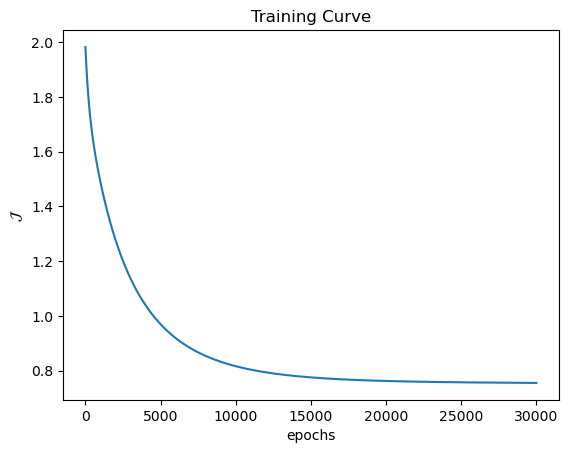

In [72]:
logreg.fit(X_training,y_training,eta=5e-3, epochs =3e4, show_curve=True)

In [73]:
logreg.W

array([[-0.06796752, -0.86975385, -0.312823  ],
       [ 0.01429127, -0.61604591, -0.90833373],
       [ 0.05324647, -0.24993757, -1.17598701],
       [-1.30881173, -0.6810061 , -1.21456025],
       [ 1.50715794,  1.26733743, -0.55445672],
       [ 0.98941704,  0.39639863, -1.32672511],
       [ 0.84029136, -0.80933253,  0.81717959],
       [-0.75583842,  0.26074985,  0.15046473],
       [ 0.32464976, -0.40521314,  0.14979482],
       [ 0.30941826, -0.11179066,  0.92020834],
       [-0.14708119, -0.36088739,  0.51865822],
       [ 0.07095727, -0.47685189,  0.36787391],
       [-0.03857136, -0.3425515 ,  0.48188187],
       [-1.66432257, -1.59526902, -0.97166345],
       [-0.74214371,  0.1686555 ,  0.79825437],
       [-0.40167127, -0.02419985,  0.76631086],
       [ 0.05531042, -0.20095983,  1.0687863 ],
       [ 0.53525025,  0.31581814,  1.59068096],
       [ 1.00839457, -2.43337843, -0.54822456],
       [-0.21449935, -1.07201108,  0.25591033],
       [-0.45564048,  0.70468204, -1.459

In [74]:
logreg.B

array([[-0.86343142, -0.12222281, -2.07091881]])

In [75]:
y_hat_training =logreg.predict(X_training)

In [76]:
y_hat_training =logreg.predict(X_training)

In [77]:
print(f"Training Accuracy: {accuracy(y_training, y_hat_training):0.4f}")

Training Accuracy: 0.6587


### Apply model to the validation set

In [78]:
y_hat_validation =logreg.predict(X_validation)

In [79]:
print(f"Validation Accuracy: {accuracy(y_validation, y_hat_validation):0.4f}")

Validation Accuracy: 0.6655


# Save model

In [80]:
softmax_pickle = open("epoch3e4_eta5e-3_no_ringo", 'wb')
pickle.dump(logreg, softmax_pickle)

In [81]:
softmax_pickle.close()

# Load saved model

In [82]:
#load the softmax model
softmax_from_pickle = pickle.load(open("epoch3e4_eta5e-3_no_ringo", 'rb'))

In [83]:
y_hat_training =softmax_from_pickle.predict(X_training)

In [84]:
np.unique(y_training), len(y_training)

(array([0, 1, 2], dtype=int8), 75307)

In [85]:
np.unique(y_hat_training), y_hat_training

(array([0, 1, 2], dtype=int64), array([1, 0, 2, ..., 1, 1, 1], dtype=int64))

In [86]:
print(f"Training Accuracy: {accuracy(y_training, y_hat_training):0.4f}")

Training Accuracy: 0.6587


In [87]:
# Construct a confusion matrix for the training set
cm = confusion_matrix(y_training, y_hat_training)

In [88]:
cm_df = pd.DataFrame(cm, 
                     index = np.unique(y_training),
                     columns = np.unique(y_hat_training))

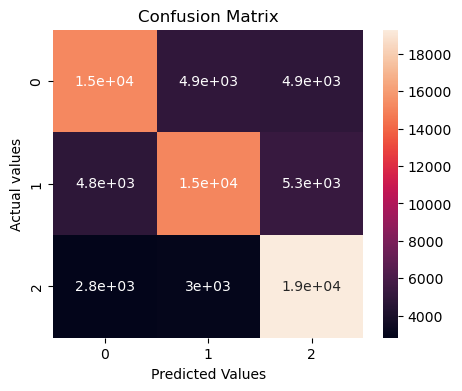

In [89]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted Values')
plt.show()

In [237]:
cm_df[0][0]

15096

In [236]:
cm_df

,0,1,2,3
0,15096,4973,4877,76
1,4787,15157,5170,127
2,2712,3015,19223,133
3,1125,2094,1229,206


In [242]:
y_hat_validation =softmax_from_pickle.predict(X_validation)

In [243]:
print(f"Validation Accuracy: {accuracy(y_validation, y_hat_validation):0.4f}")

Validation Accuracy: 0.6223


# TEST case

In [33]:
Test_case = """16.194.318.242 - - [27/Dec/2037:12:00:00 +0000] "['POST'] ['/usr'] HTTP/1.0" ['303'] 5041 "['http://morgan.biz/wp-contentcategory.htm']" "['Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749']" 4077\n"""

In [45]:
Test_case

'16.194.318.242 - - [27/Dec/2037:12:00:00 +0000] "[\'POST\'] [\'/usr\'] HTTP/1.0" [\'303\'] 5041 "[\'http://morgan.biz/wp-contentcategory.htm\']" "[\'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749\']" 4077\n'

In [46]:
df_test = pd.DataFrame({'log_entry':['george'], 'log_entry':[Test_case]})

In [47]:
df_test

,log_entry
0,16.194.318.242 - - [27/Dec/2037:12:00:00 +0000...
